In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# importing required modules 
import string
import re
import numpy as np   
from scipy import spatial
import gensim.downloader as api
import numpy as np
import nltk
from nltk.stem import PorterStemmer


## Load the GloVe model from API

In [2]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-50')

## Example vector representation of a word

In [3]:
glove_model["beautiful"]

array([ 0.54623  ,  1.2042   , -1.1288   , -0.1325   ,  0.95529  ,
        0.040524 , -0.47863  , -0.3397   , -0.28056  ,  0.71761  ,
       -0.53691  , -0.0045698,  0.73217  ,  0.12101  ,  0.28093  ,
       -0.088097 ,  0.59733  ,  0.55264  ,  0.056646 , -0.50247  ,
       -0.63204  ,  1.1439   , -0.31053  ,  0.1263   ,  1.3155   ,
       -0.52444  , -1.5041   ,  1.158    ,  0.68795  , -0.85051  ,
        2.3236   , -0.41789  ,  0.44519  , -0.019216 ,  0.28969  ,
        0.53258  , -0.023008 ,  0.58958  , -0.72397  , -0.85216  ,
       -0.17761  ,  0.14432  ,  0.40658  , -0.52003  ,  0.09081  ,
        0.082961 , -0.021975 , -1.6214   ,  0.34579  , -0.010919 ],
      dtype=float32)

## Nearest neighbours to a point represented by a word vector


In [4]:
glove_model.most_similar("king")

[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539913654327393),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253692626953)]

## queen - girl + boy = king

In [5]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.8660337924957275)]

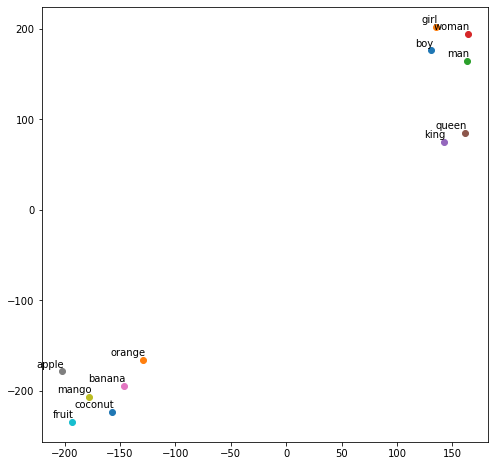

In [6]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)

In [7]:
with open("./stop_words.txt", "r") as f:
  stop_words = f.read().split("\n")

def preprocess_sentence(_sent):
  #  Remove unnecessary characters
  _sent = _sent.replace("?", "")
  _sent = _sent.replace("_", "")
  _sent = _sent.replace(",", "")
  _sent = _sent.replace(".", " ")

  _sent = _sent.lower()
  _sent = _sent.split(" ")
  # Remove Stop words
  _sent = [_word for _word in _sent if _word not in stop_words]
  _sent = [_word for _word in _sent if _word != '']
  print(_sent)
  curr_vects = []
  for _word in _sent:
    try:
      # Uses glove to encode the words into vectors
      curr_vec = glove_model[_word]
      curr_vects.append(curr_vec)
    except:
      pass
  return np.array(curr_vects)

In [8]:
def preprocess_sentence_nltk(_sent, pr=False):
    porter = PorterStemmer()
    #  Remove unnecessary characters
    _sent = _sent.replace("?", "")
    _sent = _sent.replace("_", "")
    _sent = _sent.replace(",", "")
    _sent = _sent.replace(".", " ")

    _sent = nltk.word_tokenize(_sent)
    _sent = [_word.lower() for _word in _sent]
    
    # Remove Stop words
    _sent = [_word for _word in _sent if _word not in stop_words]

    _sent = [_word for _word in _sent if _word != '']
    # Stemming of words
    # _sent = [porter.stem(_word) for _word in _sent]

    print(_sent)

    # print(_sent)
    curr_vects = []
    for _word in _sent:
        try:
            # Uses glove to encode the words into vectors
            curr_vec = glove_model[_word]
            curr_vects.append(curr_vec)
        except:
            pass
    return np.array(curr_vects)

s = 'Elements in an array are accessed _____________'
s = preprocess_sentence_nltk(s)

['elements', 'array', 'accessed']


In [9]:
all_sent = [
'How do you initialize an array in C language ?',
'How do you initialize an array in Java language ?',
'Which of the following is the correct way to declare a multidimensional array in Java?',
'When does the Array Index Out Of Bounds Exception occur?',
'Which of the following concepts make extensive use of arrays?',
'What are the advantages of arrays?',
'What are the disadvantages of arrays?',
 'Assuming int is of 4 bytes, what is the size of int arr[15];?',
'The index of the first element in an array is __________',
 'Elements in an array are accessed _____________'
]

all_vects = []

In [10]:
# Encode all example sentences
for _sent in all_sent:
  curr_vects = preprocess_sentence_nltk(_sent,True)
  all_vects.append(curr_vects)

['initialize', 'array', 'language']
['initialize', 'array', 'java', 'language']
['correct', 'declare', 'multidimensional', 'array', 'java']
['array', 'index', 'bounds', 'exception', 'occur']
['concepts', 'make', 'extensive', 'arrays']
['advantages', 'arrays']
['disadvantages', 'arrays']
['assuming', 'int', '4', 'bytes', 'size', 'int', 'arr', '[', '15', ']', ';']
['index', 'element', 'array']
['elements', 'array', 'accessed']


In [11]:
query = 'Which of the following is used to instantiate an array in C language?'

# Encode query sentence
query_vects = preprocess_sentence_nltk(query)

['instantiate', 'array', 'language']


In [12]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


for i in range(0, len(all_vects)):
  # Fit the query string onto a nearest neighbour space
  nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(all_vects[i])
  # For every sentence calculate pairwise 1st nearest neighbour to every word
  distances, indices = nbrs.kneighbors(query_vects)
  # The distances give us pairwise nearest neighbour between current sentence and query sentence
  # We sum those distances the lower the sum the nearer the meaning of those words (pairwise)
  dist_sum = np.sum(distances)
  print(i," : ", dist_sum)


0  :  2.5212837143103397
1  :  2.5212837143103397
2  :  9.608060210210121
3  :  10.304503233581622
4  :  13.868408260850881
5  :  14.554562822151691
6  :  15.543821066813742
7  :  13.74246920452156
8  :  11.231526660233952
9  :  10.86606585083154
